<a href="https://colab.research.google.com/github/Kritzr/machine_learning/blob/main/PCA_2022503035/pca_implemetation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
print("pca-2022503035")

pca-2022503035


## importing of libraries we use the sklear toy datasets here

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/chethuhn/network-intrusion-dataset/versions/1


##a class for the pca reduction

In [24]:
class PCAHelper:
    def __init__(self, n_components=2):
        self.pca = PCA(n_components=n_components)

    def transform(self, X):
        return self.pca.fit_transform(X)

    def fit(self, X):
        self.pca.fit(X)

##class for visualising

In [25]:
class Visualizer:
    @staticmethod
    def plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix"):
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
        plt.title(title)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    @staticmethod
    def plot_pca_scatter(X_pca, y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        plt.colorbar()
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title('PCA of Iris Dataset')
        plt.show()


##class for the random forest classifier

In [26]:
rf_model = RandomForestModel()
rf_model.train(X_train, y_train)
y_pred_original = rf_model.predict(X_test)
accuracy, precision, recall, f1 = rf_model.evaluate(y_test, y_pred_original)

## we load the iris dataset->use direct pca (not my class) to reduce it to 2 dimensions

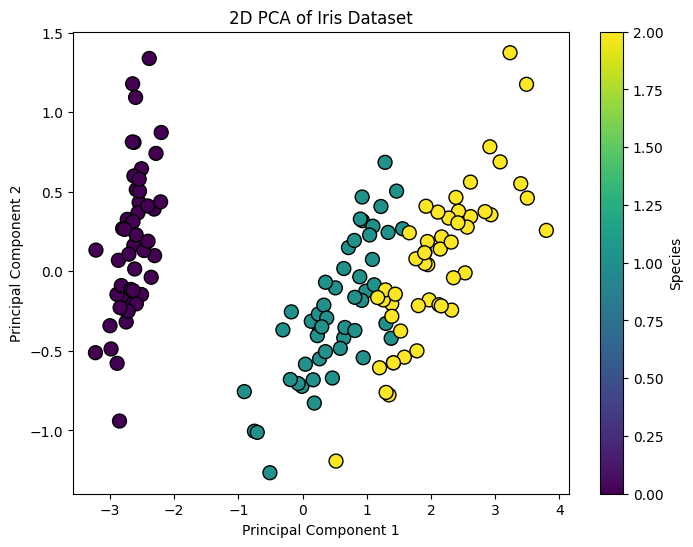

In [28]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target
#here the components mean dimension of 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the reduced 2D data
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.colorbar(label='Species')
plt.title('2D PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## we load the wine toy dataset->apply pca and see its variance ratio

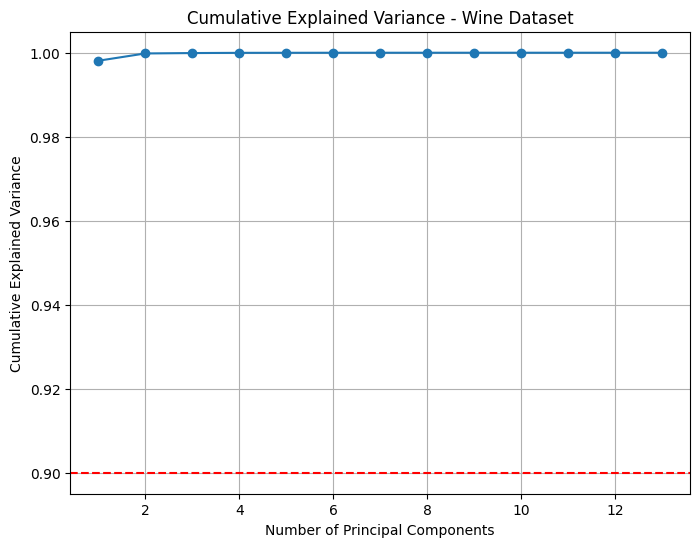

In [29]:
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

pca_wine = PCA()
pca_wine.fit(X_wine)

# Plot the cumulative explained variance graph
explained_variance = np.cumsum(pca_wine.explained_variance_ratio_)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance - Wine Dataset')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')  # 90% variance line
plt.show()



## we do the same here. we split the data into two halves -> one for training and the other for testing-> we then normalise the dataset to load it to pca

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## here, we use the pca, (the imported one), apply logistic regression classifier, and evaluate its accuracy

In [49]:
#reduced the dimension to 5 (cause why not)
pca_cancer = PCA(n_components=5)
X_train_pca = pca_cancer.fit_transform(X_train_scaled)
X_test_pca = pca_cancer.transform(X_test_scaled)

# Logistic Regression Classifier function applied herer
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

# Predict
y_pred = log_reg.predict(X_test_pca)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with PCA: {accuracy:.2f}')


Accuracy with PCA: 0.99


## the same is done here but without pca

In [32]:
# Logistic Regression without PCA
log_reg_no_pca = LogisticRegression()
log_reg_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = log_reg_no_pca.predict(X_test_scaled)

# Evaluate accuracy without PCA
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f'Accuracy without PCA: {accuracy_no_pca:.2f}')


Accuracy without PCA: 0.98


## here i am trying my own way->to put in as classes

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


##pca class

In [34]:
class PCAHandler:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.pca = PCA(n_components=self.n_components)

    def fit_transform(self, X):
        return self.pca.fit_transform(X)

    def transform(self, X):
        return self.pca.transform(X)

    def explained_variance(self):
        return self.pca.explained_variance_ratio_

    def cumulative_explained_variance(self):
        return np.cumsum(self.pca.explained_variance_ratio_)


##rf class

In [35]:
class RandomForestModel:
    def __init__(self, n_estimators=100, random_state=42):
        self.rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

    def fit(self, X_train, y_train):
        self.rf.fit(X_train, y_train)

    def predict(self, X_test):
        return self.rf.predict(X_test)

    def accuracy(self, y_test, y_pred):
        return accuracy_score(y_test, y_pred)

    def confusion_matrix(self, y_test, y_pred):
        return confusion_matrix(y_test, y_pred)

    def plot_confusion_matrix(self, y_test, y_pred):
        cm = self.confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.show()


##visualiser class

In [36]:
class Visualizer:
    def __init__(self):
        pass

    def plot_2d(self, X, y, title='2D Plot'):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
        plt.colorbar()
        plt.title(title)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

    def plot_explained_variance(self, explained_variance):
        plt.figure(figsize=(8, 6))
        plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
        plt.title('Cumulative Explained Variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Explained Variance')
        plt.grid()
        plt.show()


## call my function, which literally the same but chumma, i am showing the confusion matrices

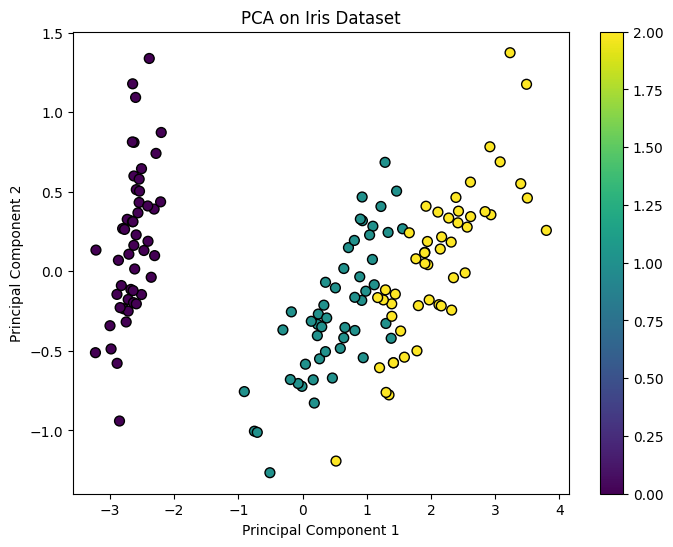

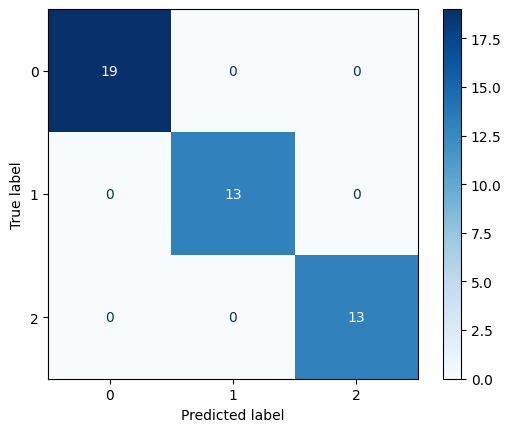

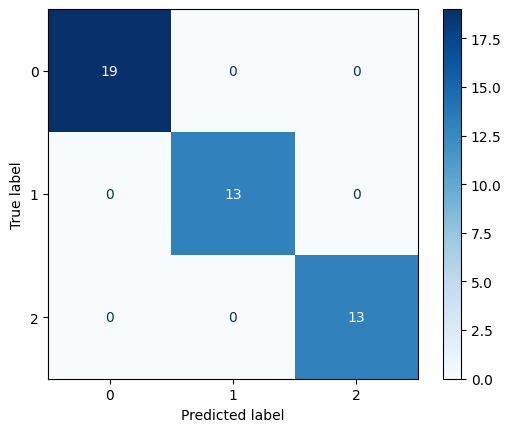

In [37]:
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

pca_handler = PCAHandler(n_components=2)
X_iris_pca = pca_handler.fit_transform(X_iris)


visualizer = Visualizer()
visualizer.plot_2d(X_iris_pca, y_iris, title="PCA on Iris Dataset")

# Train Random Forest without PCA
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
rf = RandomForestModel()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Show confusion matrix
rf.plot_confusion_matrix(y_test, y_pred)

# Train Random Forest with PCA-transformed data
X_train_pca, X_test_pca = pca_handler.fit_transform(X_train), pca_handler.transform(X_test)
rf.fit(X_train_pca, y_train)
y_pred_pca = rf.predict(X_test_pca)

# Show confusion matrix
rf.plot_confusion_matrix(y_test, y_pred_pca)


##same for the wine dataset

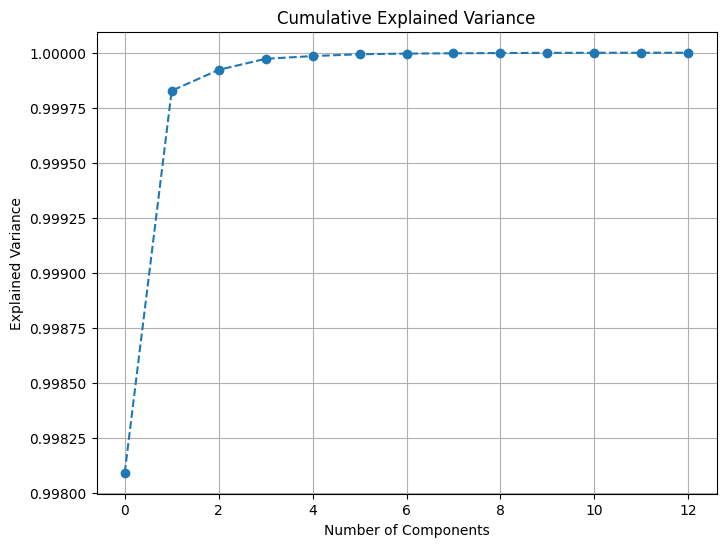

Optimal number of components to explain 90% variance: 1


In [38]:

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Apply PCA to Wine dataset
pca_handler = PCAHandler(n_components=None)  # No dimensionality reduction, we want the full dataset beacuse we are taking the cummilative (that is all over)
X_wine_pca = pca_handler.fit_transform(X_wine)

visualizer.plot_explained_variance(pca_handler.explained_variance())

# Identify number of components that explain at least 90% of the variance
cumulative_variance = pca_handler.cumulative_explained_variance()
optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Optimal number of components to explain 90% variance: {optimal_components}")


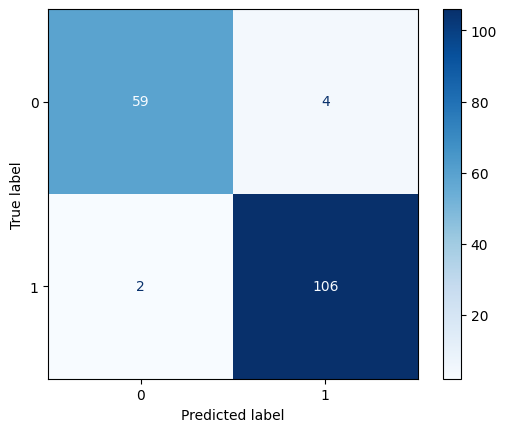

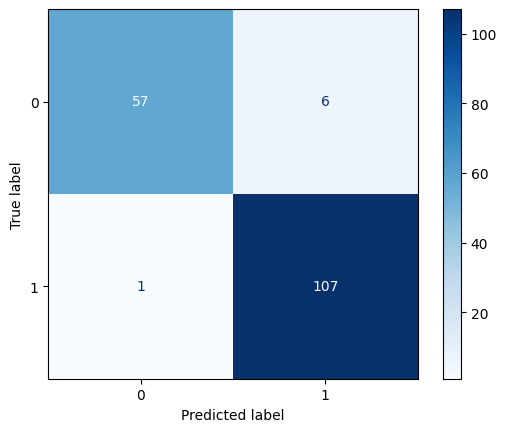

In [39]:
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

pca_handler = PCAHandler(n_components=10)
X_cancer_pca = pca_handler.fit_transform(X_cancer)


X_train, X_test, y_train, y_test = train_test_split(X_cancer_pca, y_cancer, test_size=0.3, random_state=42)
rf.fit(X_train, y_train)
y_pred_pca = rf.predict(X_test)

# Show confusion matrix for PCA-transformed data
rf.plot_confusion_matrix(y_test, y_pred_pca)

# Train KNN on PCA-transformed data (just for comparison >)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Show confusion matrix for KNN classifier
rf.plot_confusion_matrix(y_test, y_pred_knn)



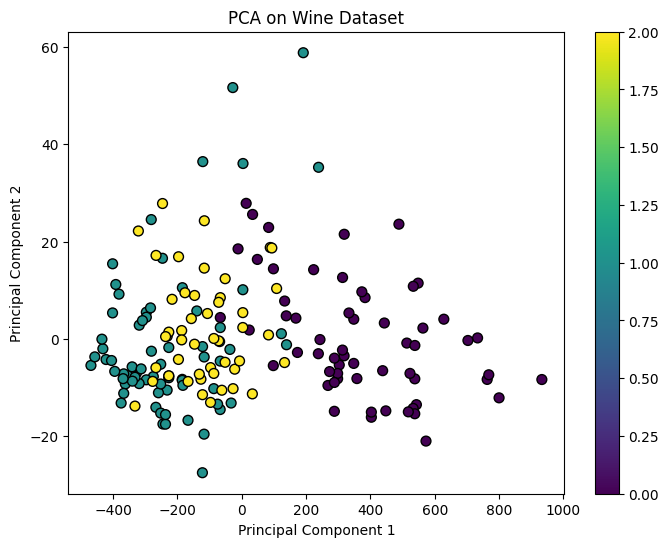

In [40]:

wine = load_wine()
X_wine = wine.data
y_wine = wine.target

pca_handler = PCAHandler(n_components=2)
X_wine_pca = pca_handler.fit_transform(X_wine)

visualizer = Visualizer()
visualizer.plot_2d(X_wine_pca, y_wine, title="PCA on Wine Dataset")


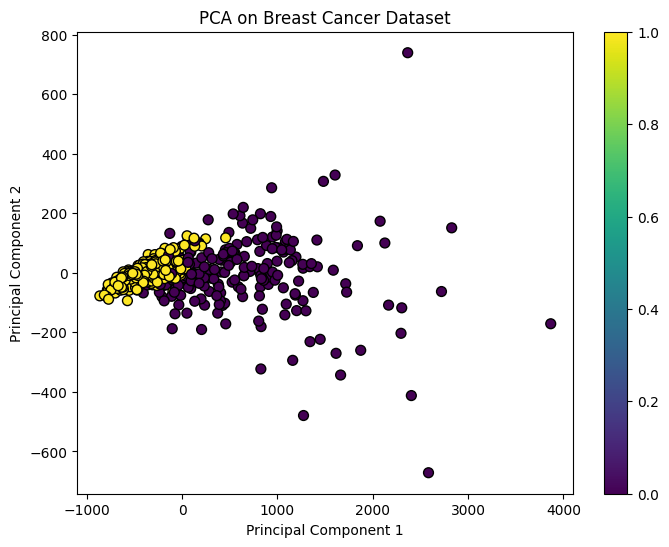

In [41]:

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

pca_handler = PCAHandler(n_components=2)
X_cancer_pca = pca_handler.fit_transform(X_cancer)

visualizer = Visualizer()
visualizer.plot_2d(X_cancer_pca, y_cancer, title="PCA on Breast Cancer Dataset")


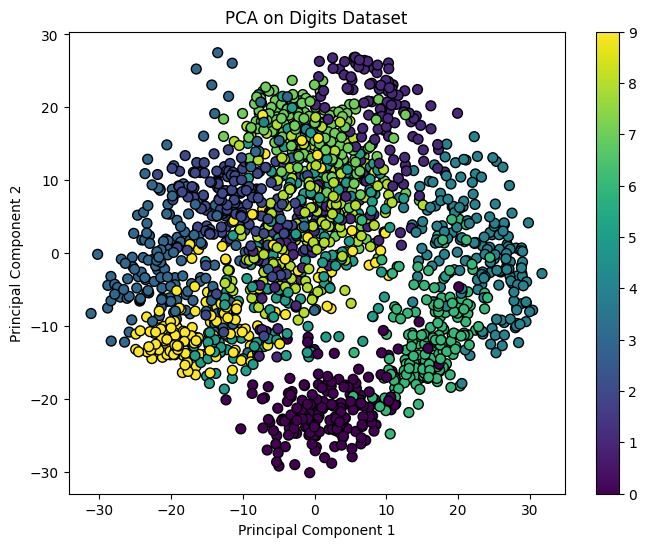

In [43]:
from sklearn.datasets import load_digits

# Load the Optical Recognition of Handwritten Digits dataset
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Apply PCA to reduce the dataset to 2 components
pca_handler = PCAHandler(n_components=2)
X_digits_pca = pca_handler.fit_transform(X_digits)

# Visualize the 2D PCA-transformed Digits dataset
visualizer = Visualizer()
visualizer.plot_2d(X_digits_pca, y_digits, title="PCA on Digits Dataset")


##above all steps are done and repeated for this step as well

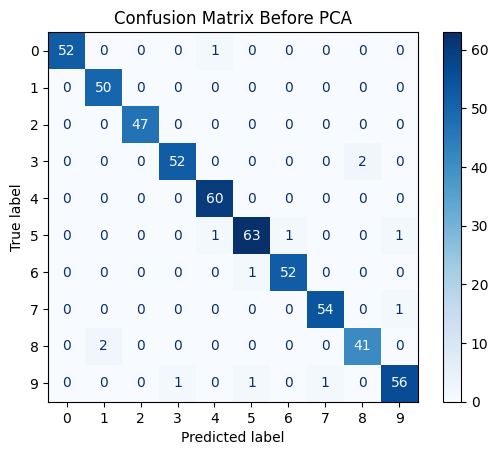

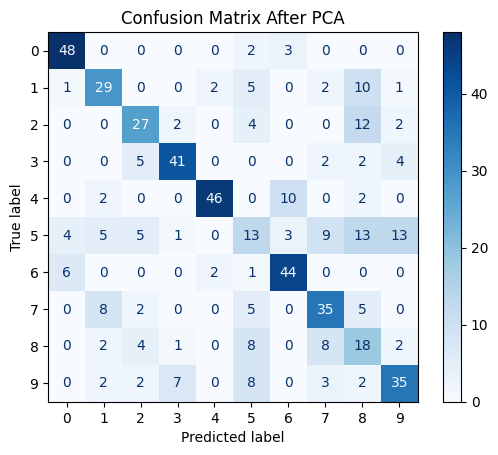

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
t
y_pred = rf.predict(X_test)

cm_before_pca = confusion_matrix(y_test, y_pred)
disp_before_pca = ConfusionMatrixDisplay(confusion_matrix=cm_before_pca)
disp_before_pca.plot(cmap='Blues')
plt.title('Confusion Matrix Before PCA')
plt.show()

pca_handler = PCAHandler(n_components=2)
X_train_pca = pca_handler.fit_transform(X_train)
X_test_pca = pca_handler.transform(X_test)

rf.fit(X_train_pca, y_train)

y_pred_pca = rf.predict(X_test_pca)

cm_after_pca = confusion_matrix(y_test, y_pred_pca)
disp_after_pca = ConfusionMatrixDisplay(confusion_matrix=cm_after_pca)
disp_after_pca.plot(cmap='Blues')
plt.title('Confusion Matrix After PCA')
plt.show()


##done for the  Optical recognition of handwritten digits dataset

In [45]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()


rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)

end_time = time.time()
time_without_pca = end_time - start_time

accuracy_without_pca = accuracy_score(y_test, y_pred)

pca_handler = PCA(n_components=2)
X_train_pca = pca_handler.fit_transform(X_train)
X_test_pca = pca_handler.transform(X_test)


start_time = time.time()

rf.fit(X_train_pca, y_train)

y_pred_pca = rf.predict(X_test_pca)

end_time = time.time()
time_with_pca = end_time - start_time

accuracy_with_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy without PCA: {accuracy_without_pca:.4f}")
print(f"Training Time without PCA: {time_without_pca:.4f} seconds")

print(f"Accuracy with PCA: {accuracy_with_pca:.4f}")
print(f"Training Time with PCA: {time_with_pca:.4f} seconds")


Accuracy without PCA: 0.9759
Training Time without PCA: 0.2942 seconds
Accuracy with PCA: 0.6222
Training Time with PCA: 0.2545 seconds


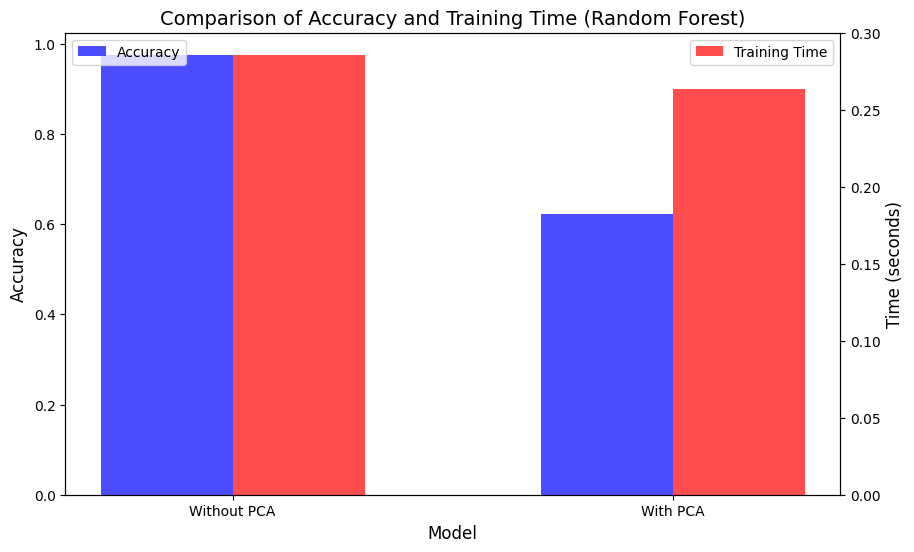

In [46]:
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

end_time = time.time()
time_without_pca = end_time - start_time

accuracy_without_pca = accuracy_score(y_test, y_pred)

pca_handler = PCA(n_components=2)
X_train_pca = pca_handler.fit_transform(X_train)
X_test_pca = pca_handler.transform(X_test)

start_time = time.time()

rf.fit(X_train_pca, y_train)

y_pred_pca = rf.predict(X_test_pca)

end_time = time.time()
time_with_pca = end_time - start_time

accuracy_with_pca = accuracy_score(y_test, y_pred_pca)
labels = ['Without PCA', 'With PCA']
accuracy_values = [accuracy_without_pca, accuracy_with_pca]
time_values = [time_without_pca, time_with_pca]


fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.3
index = range(len(labels))

bar1 = ax1.bar(index, accuracy_values, bar_width, label='Accuracy', color='b', alpha=0.7)
ax2 = ax1.twinx()  # Create another y-axis for the time graph
bar2 = ax2.bar([i + bar_width for i in index], time_values, bar_width, label='Training Time', color='r', alpha=0.7)

ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax2.set_ylabel('Time (seconds)', fontsize=12)
ax1.set_title('Comparison of Accuracy and Training Time (Random Forest)', fontsize=14)


ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(labels)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
